# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Random Forest because this model tends to perform better when there are alot of features and when there is some missing data.  Based upon,
a review of the data source, there are 58 features as well as missing data.*

## Split the Data into Training and Testing Sets

In [3]:
# Create the labels set `y` and features DataFrame `X`
X=data.copy()
X=X.drop(columns=['spam'])
y=data['spam']
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [4]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [5]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test=train_test_split(X,y)
X_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
3748,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.000,0.000,0.0,0.000,0.000,0.000,2.000,4,6
2173,0.00,0.00,0.91,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.000,0.232,0.0,0.116,0.000,0.000,1.619,10,68
1877,0.00,0.37,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.065,0.261,0.0,0.000,0.000,0.000,1.114,5,39
820,0.46,0.93,0.93,0.0,0.46,0.0,0.00,0.46,0.0,1.86,...,0.0,0.000,0.252,0.0,1.683,0.168,0.084,57.076,634,742
941,0.00,0.00,0.00,0.0,0.00,0.0,0.86,0.00,0.0,0.00,...,0.0,0.000,0.151,0.0,0.759,0.000,0.000,2.750,10,55


In [6]:
y_test

548     1
3065    0
1521    1
594     1
4206    0
       ..
1065    1
135     1
1942    0
684     1
422     1
Name: spam, Length: 1151, dtype: int64

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [7]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
X_scaler=StandardScaler().fit(X_train)

In [8]:
# Fit the Standard Scaler with the training data


In [9]:
# Scale the training data
X_train_scal=X_scaler.transform(X_train)
X_test_scal=X_scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [10]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

logic_regression_model=LogisticRegression(random_state=1)
logic_regression_model.fit(X_train_scal,y_train)

#print(f'Train Score:  {Logic_Regression_model.score(X_train_scal,y_train)}')


LogisticRegression(random_state=1)

In [11]:
#print Train Score:

print(f'Train Score:  {logic_regression_model.score(X_train_scal,y_train)}')


Train Score:  0.9214492753623188


In [12]:
# Make and save testing predictions with the saved logistic regression model using the test data
testing_prediction=logic_regression_model.predict(X_test_scal)

# Review the predictions
testing_prediction[:5]

array([1, 0, 0, 1, 0])

In [13]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.

accuracy_score(y_test,testing_prediction)

0.9322328410078193

## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [14]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scal, y_train)

print(f'Training Score: {random_forest.score(X_train_scal, y_train)}')
print(f'Testing Score: {random_forest.score(X_test_scal, y_test)}')

Training Score: 1.0
Testing Score: 0.9643788010425717


In [15]:
# Make and save testing predictions with the saved logistic regression model using the test data
random_for_predict=random_forest.predict(X_test_scal)

# Review the predictions
random_for_predict

array([1, 0, 0, ..., 0, 1, 1])

In [16]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
acc_score = accuracy_score(y_test, random_for_predict)
acc_score

0.9643788010425717

In [17]:
feature_importances = random_forest.feature_importances_


In [18]:
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted=importances_sorted[:10]
importances_sorted

[(0.1265949930553916, 'char_freq_!'),
 (0.0993957704094634, 'char_freq_$'),
 (0.0736962108842415, 'word_freq_remove'),
 (0.06520400754967132, 'capital_run_length_average'),
 (0.06107285492155204, 'word_freq_free'),
 (0.05835873351562387, 'capital_run_length_longest'),
 (0.05379922056381412, 'word_freq_your'),
 (0.04229783634582808, 'capital_run_length_total'),
 (0.04210266134471511, 'word_freq_hp'),
 (0.03530644311161313, 'word_freq_money')]

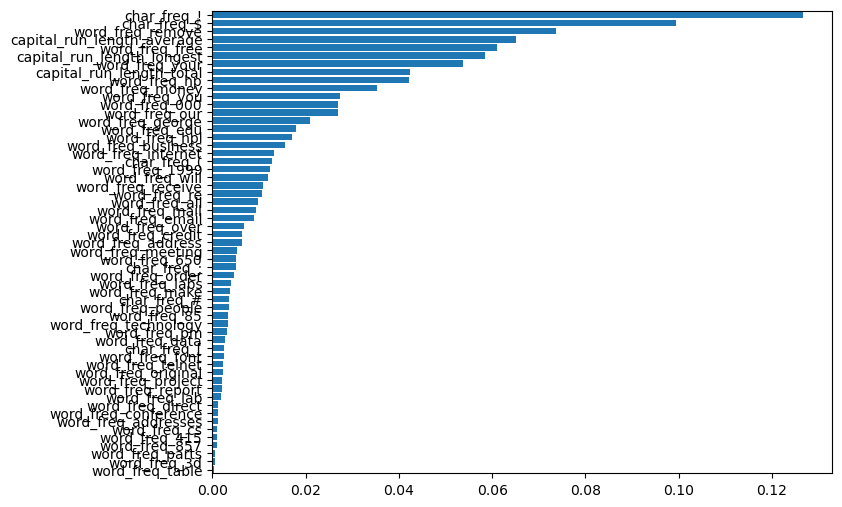

In [19]:
from matplotlib import pyplot as plt

# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*The Random Forest Classifier model perfromed better than Logistic Regression model by approx 3%.  Because the Logicistic Regression model doesn't work as well with alot of features that don't have a linear relatinoship, where as the Random Forest Classifier does.  The Random Forest appears to have narrowed down the feeatures to 7, which may have been lost with the Logistic Regression model.   Seperately, I ran a KNN Logic regression.  It indicated we needed 17 clusters/features, which is significantly more than the Random Tree.  It appears that the more features you have in a logic regressino, the less linear is seems and the more likey it will be a hyperplane, inwhich case, non-linear models, such as a random decision tree is better.*